### Problem 24 ###

A permutation is an ordered arrangement of objects. For example, 3124 is one possible permutation of the digits 1, 2, 3 and 4. If all of the permutations are listed numerically or alphabetically, we call it lexicographic order. The lexicographic permutations of 0, 1 and 2 are:

012   021   102   120   201   210

What is the millionth lexicographic permutation of the digits 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9?

In [40]:
import math

In [72]:
g = lambda n: 1 if n ==1 else f(n-1)*n

In [195]:
import copy 

g = lambda n: 1 if n <=1 else f(n-1)*n

def nlexperm(n,chars):
    l =  copy.deepcopy(chars)
    if n == 1:
        return l
    'returns the nth lexicographic permutation of the digits in the list l'
    # i have len(l) - 1 permutations for every l in l starting the sequencnes
    q,r = divmod(n,g(len(l)-1))
    q = l.pop(q)
    ans =  nlexperm(r,l)
    ans.insert(0, q)
    return ans

def dumblexperm(n,chars,ans = []):
    'returns the nth lexicographic permitation dumbly'
    l = copy.deepcopy(chars)
    k = len(l)
    if k == 1:
        return ans[:-1] + l + [ans[-1]]
    if len(ans) == 0:
        l.sort()
    j = g(k-1)
    o = 0
    while n > j:
        n -= j
        o += 1        
    ans += [l[o]]
    l.remove(ans[-1])
    return dumblexperm(n,l,ans)

In [196]:
%timeit dumblexperm(10**6,chars)

The slowest run took 6.90 times longer than the fastest. This could mean that an intermediate result is being cached.
3.61 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [197]:
%timeit nlexperm(10**6-1,chars)

274 µs ± 57.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
import numpy as np
np.linspace(31,91,7)

array([ 31.,  41.,  51.,  61.,  71.,  81.,  91.])

In [63]:
def f(x):
    return math.factorial(x)

In [82]:
nlexperm(10**6-1,list(range(10)))

[2, 7, 8, 3, 9, 1, 5, 4, 0, 6]

In [183]:
ns = [10**i for i in range(1,7)]
chars = [i for i in range(10)]

for n in ns:
    assert(dumblexperm(n,chars, ans = []) == nlexperm(n-1,chars))


ns = [10**i for i in range(1,12)]
chars2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q']


ns = [10**i for i in range(1,12)]
chars2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q']

for n in ns:
    print(dumblexperm(n,chars2, ans = []), nlexperm(n-1,chars2))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 'n', 'q'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 'n', 'q']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'q', 'm', 'o', 'n', 'p'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'q', 'm', 'o', 'n', 'p']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'n', 'm', 'p', 'o', 'k', 'q'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'n', 'm', 'p', 'o', 'k', 'q']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'q', 'p', 'l', 'n', 'm', 'j', 'o'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'q', 'p', 'l', 'n', 'm', 'j', 'o']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'p', 'q', 'j', 'n', 'l', 'i', 'o'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'p', 'q', 'j', 'n', 'l', 'i', 'o']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'j', 'o', 'p', 'k', 'q', 'i', 'm', 'l', 'h', 'n'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'j', 'o', 'p', 'k'

In [160]:
for n in ns:
    print(n,dumblexperm(n,chars, ans = []), nlexperm(n-1,chars))

10 [0, 1, 2, 3, 4, 5, 7, 8, 6, 9] [0, 1, 2, 3, 4, 5, 7, 8, 6, 9]
100 [0, 1, 2, 3, 4, 9, 5, 7, 6, 8] [0, 1, 2, 3, 4, 9, 5, 7, 6, 8]
1000 [0, 1, 2, 4, 6, 5, 8, 7, 3, 9] [0, 1, 2, 4, 6, 5, 8, 7, 3, 9]
10000 [0, 1, 3, 9, 8, 4, 6, 5, 2, 7] [0, 1, 3, 9, 8, 4, 6, 5, 2, 7]
100000 [0, 3, 5, 8, 9, 2, 6, 4, 1, 7] [0, 3, 5, 8, 9, 2, 6, 4, 1, 7]
1000000 [2, 7, 8, 3, 9, 1, 5, 4, 0, 6] [2, 7, 8, 3, 9, 1, 5, 4, 0, 6]


In [21]:
%timeit nlexperm(3,[0,2,1])

2.52 µs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


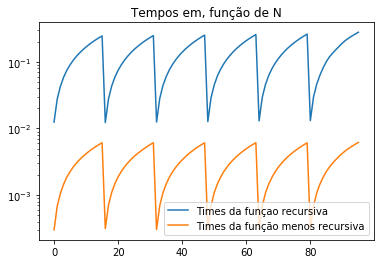

In [208]:
from time import clock
import matplotlib.pyplot as plt
import numpy as np 


def timer(func,n,chars,dumb=False):
    if dumb == True:
        t0 = clock()
        func(n,chars,[])
        t1 = clock()
    t0 = clock()
    func(n,chars)
    t1 = clock()
    return t1 - t0

times_dumb = []
times_isit = []

ns = [10**i for i in range(2,8)]
chars = [i for i in range(13)]

for n in ns:
    meaning = []
    reason = []
    for i in range(16):
        for _ in range(19):
            s = timer(nlexperm,n-1,chars)
            t = timer(dumblexperm,n,chars)
            meaning.append(t)
            reason.append(s)
        tim = sum(meaning[:-4])/15
        tom = sum(reason[:-4])/15
        times_dumb += [tim]
        times_isit += [tom]

plt.semilogy(times_dumb,label='Times da funçao recursiva')
plt.semilogy(times_isit,label='Times da função menos recursiva')
plt.title('Tempos em, função de N')
plt.legend(loc=0)
plt.show()



In [35]:
dumblexperm(10**6,list(range(10)))

[2, 7, 8, 3, 9, 1, 5, 4, 0, 6]

In [ ]:
[2, 7, 8, 3, 9, 1, 5, 4, 0, 6]

In [169]:
ns = [10**i for i in range(1,7)]
chars = [i for i in range(10)]
for n in ns:
    assert(dumblexperm(n,chars, ans = []) == nlexperm(n-1,chars))



ns = [10**i for i in range(1,12)]
chars2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q']
for n in ns:
    assert(dumblexperm(n,chars2, ans = []) == nlexperm(n-1,chars2))
    

